In [11]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames 


# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [12]:
from src import support_EDA as sp 

## Global Renewable Energy Production (2000-2023)
[Source](https://www.kaggle.com/datasets/ahmedgaitani/global-renewable-energy?resource=download)

Dataset Units: Gwh

Columns:
- Year: The year of data collection (e.g., 2000, 2001, etc.).
- Country: The name of the country.
- SolarEnergy: Annual solar energy production in gigawatt-hours (GWh).
- WindEnergy: Annual wind energy production in gigawatt-hours (GWh).
- HydroEnergy: Annual hydro energy production in gigawatt-hours (GWh).
- OtherRenewableEnergy: Annual energy production from other renewable sources (e.g., geothermal, biomass) in gigawatt-hours (GWh).
- TotalRenewableEnergy: Total annual renewable energy production in gigawatt-hours (GWh).

In [13]:
df_general = pd.read_csv("data/raw/global_renewable_energy_production.csv")
df_general.head()

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
0,2000,USA,437.086107,1435.928598,1544.389701,319.396318,3736.800724
1,2001,USA,240.416776,402.792876,398.742141,439.779266,1481.731059
2,2002,USA,641.003511,1120.494351,334.993640,486.459433,2582.950935
3,2003,USA,849.198377,476.040844,609.102444,132.532029,2066.873694
4,2004,USA,373.818019,882.183361,1034.306532,181.053113,2471.361025


In [14]:
df_general.columns 

Index(['Year', 'Country', 'SolarEnergy', 'WindEnergy', 'HydroEnergy',
       'OtherRenewableEnergy', 'TotalRenewableEnergy'],
      dtype='object')

In [15]:
df_general.columns = ['Year', 'Country', 'Solar Energy', 'Wind Energy', 'Hydro Energy',
       'Other Renewable Energy', 'Total Renewable Energy']

In [16]:
df_general.columns

Index(['Year', 'Country', 'Solar Energy', 'Wind Energy', 'Hydro Energy',
       'Other Renewable Energy', 'Total Renewable Energy'],
      dtype='object')

In [17]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    240 non-null    int64  
 1   Country                 240 non-null    object 
 2   Solar Energy            240 non-null    float64
 3   Wind Energy             240 non-null    float64
 4   Hydro Energy            240 non-null    float64
 5   Other Renewable Energy  240 non-null    float64
 6   Total Renewable Energy  240 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.3+ KB


In [18]:
df_general.isna().sum()/df_general.shape[0]*100

Year                      0.0
Country                   0.0
Solar Energy              0.0
Wind Energy               0.0
Hydro Energy              0.0
Other Renewable Energy    0.0
Total Renewable Energy    0.0
dtype: float64

In [19]:
df_general.duplicated().sum()

np.int64(0)

In [20]:
for col in df_general.columns:
    print(col)
    print(df_general[col].unique())
    print('-'*50)

Year
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
--------------------------------------------------
Country
['USA' 'China' 'India' 'Germany' 'UK' 'France' 'Brazil' 'Canada'
 'Australia' 'Japan']
--------------------------------------------------
Solar Energy
[437.08610696 240.4167764  641.00351057 849.19837672 373.81801866
 650.66760525 510.4629858  633.17311198 158.54643369 374.15239226
 209.83441136 332.90198344 592.03925141 945.54904741 179.64325185
 449.80956072 352.84105872 167.09557931 104.96990541 794.14331202
 876.79308329 379.88408954 898.49146832 784.70654376 570.45954644
 128.28626712 916.80982653 305.91834894 936.72788711 823.30486921
 826.69613965 305.14164629 106.25691748 207.8788306  566.91155957
 966.20256545 356.35644494 146.33087612 230.40538488 704.92199267
 431.00481945 181.26079305 136.6976274  560.88375247 721.84396429
 406.95971595 332.14746494 576.68552052 910.37625145 753.36011098
 6

In [21]:
df_general.to_csv("data/usable/global_renewable_energy_production.csv")


In [22]:
df_general_pivot = sp.pivot_df(df_general, ["Year", "Country"], "Energy type", "Production (GWh)")

df_general_pivot.sample(10)

,Year,Country,Energy type,Production (GWh)
1062,2006,UK,Total Renewable Energy,2553.877528
332,2020,Germany,Wind Energy,290.169691
388,2004,Brazil,Wind Energy,649.367468
463,2007,Japan,Wind Energy,716.338589
328,2016,Germany,Wind Energy,411.814755
106,2010,UK,Solar Energy,151.802884
111,2015,UK,Solar Energy,831.519611
712,2016,Japan,Hydro Energy,536.905326
248,2008,USA,Wind Energy,1433.551198
1117,2013,Brazil,Total Renewable Energy,2626.720283


In [23]:
df_general_pivot.to_csv("data/usable/global_renewable_energy_production_pivot.csv")

In [121]:
df_countries = pd.read_csv("data/usable/global_energy_consumption.csv", index_col = 0)

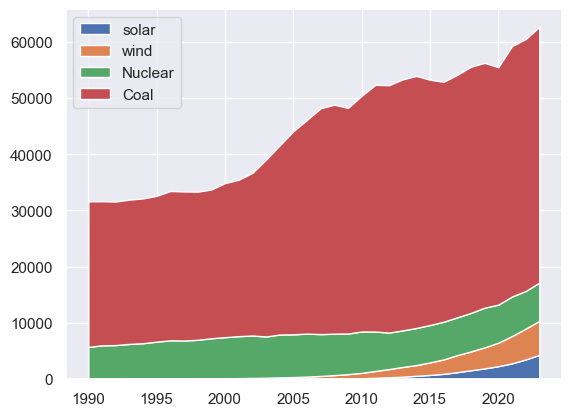

In [122]:
# set seaborn style
sns.set_theme()
 
# Data
x = df_countries['Year']
y = [df_countries['Solar (TWh, substituted energy)'], df_countries['Wind (TWh, substituted energy)'], df_countries['Nuclear (TWh, substituted energy)'], df_countries['Coal (TWh, substituted energy)']]
 
# Plot
plt.stackplot(x,y, labels=['solar','wind','Nuclear', 'Coal'])
plt.legend(loc='upper left')
plt.show()

## Global primary energy consumption by source (1990-2023)
[Source](https://ourworldindata.org/grapher/global-energy-substitution?time=1990..2023)

- Dataset Units: Gwh
- Consumption

In [24]:
df_countries = pd.read_csv("data/raw/global-energy-substitution.csv")

In [25]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Entity                                         76 non-null     object 
 1   Code                                           76 non-null     object 
 2   Year                                           76 non-null     int64  
 3   Other renewables (TWh, substituted energy)     76 non-null     float64
 4   Biofuels (TWh, substituted energy)             76 non-null     float64
 5   Solar (TWh, substituted energy)                76 non-null     float64
 6   Wind (TWh, substituted energy)                 76 non-null     float64
 7   Hydropower (TWh, substituted energy)           76 non-null     float64
 8   Nuclear (TWh, substituted energy)              76 non-null     float64
 9   Gas (TWh, substituted energy)                  76 non-nu

In [26]:
df_countries.head()

,Entity,Code,Year,"Other renewables (TWh, substituted energy)","Biofuels (TWh, substituted energy)","Solar (TWh, substituted energy)","Wind (TWh, substituted energy)","Hydropower (TWh, substituted energy)","Nuclear (TWh, substituted energy)","Gas (TWh, substituted energy)","Oil (TWh, substituted energy)","Coal (TWh, substituted energy)","Traditional biomass (TWh, substituted energy)"
0,World,OWID_WRL,1800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,5556
1,World,OWID_WRL,1810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,5833
2,World,OWID_WRL,1820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0,6111
3,World,OWID_WRL,1830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.0,6389
4,World,OWID_WRL,1840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356.0,6944


In [27]:
df_countries.isna().sum()/df_countries.shape[0]*100

Entity                                           0.0
Code                                             0.0
Year                                             0.0
Other renewables (TWh, substituted energy)       0.0
Biofuels (TWh, substituted energy)               0.0
Solar (TWh, substituted energy)                  0.0
Wind (TWh, substituted energy)                   0.0
Hydropower (TWh, substituted energy)             0.0
Nuclear (TWh, substituted energy)                0.0
Gas (TWh, substituted energy)                    0.0
Oil (TWh, substituted energy)                    0.0
Coal (TWh, substituted energy)                   0.0
Traditional biomass (TWh, substituted energy)    0.0
dtype: float64

In [28]:
df_countries.duplicated().sum()

np.int64(0)

In [29]:
df_countries['Entity'].unique()

array(['World'], dtype=object)

In [30]:
df_world = df_countries[df_countries['Year'] >= 1990]

In [31]:
df_world['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023])

Vamos a transformar los datos a formato largo para tener las columnas en filas (y no una columna para cada tipo de energía.)

In [32]:
df_world_pivot = sp.pivot_df(df_world, ["Entity", "Code", "Year"], "Energy type", "Consumption (TWh)")

In [33]:
df_world_pivot.sample(10)

,Entity,Code,Year,Energy type,Consumption (TWh)
186,World,OWID_WRL,2006,"Nuclear (TWh, substituted energy)",7653.721700
299,World,OWID_WRL,2017,"Coal (TWh, substituted energy)",43193.280000
116,World,OWID_WRL,2004,"Wind (TWh, substituted energy)",246.722410
199,World,OWID_WRL,2019,"Nuclear (TWh, substituted energy)",7071.781700
235,World,OWID_WRL,2021,"Gas (TWh, substituted energy)",40239.016000
82,World,OWID_WRL,2004,"Solar (TWh, substituted energy)",8.554863
101,World,OWID_WRL,2023,"Solar (TWh, substituted energy)",4264.261000
19,World,OWID_WRL,2009,"Other renewables (TWh, substituted energy)",1049.248000
159,World,OWID_WRL,2013,"Hydropower (TWh, substituted energy)",10323.586000
61,World,OWID_WRL,2017,"Biofuels (TWh, substituted energy)",960.004760


In [34]:
df_world.to_csv('data/usable/global_energy_consumption.csv')

In [35]:
df_world_pivot.to_csv('data/usable/global_energy_consumption_pivot.csv', index=False)

## Dataset: Renewable Energy World Wide : 1965~2022 
[Source](https://www.kaggle.com/datasets/belayethossainds/renewable-energy-world-wide-19652022/data?select=01+renewable-share-energy.csv)

### `12-solar-energy-consumption.csv`:

Ideas:
- Hacer un ranking de países o continentes que más producen y más consumen (una otra o las dos)
- Electricity from solar (TWh): potencia consumida que se ha generado a partir de energía solar.
- `definición`: energía de origen solar consumida al año. Hay dos tecnologías para energía solar: (1) mayoritaria: fotovotaica que es con paneles solares y (2) termosolar: mucho menos utilizada.


In [36]:
df_solar_consump = pd.read_csv("data/raw/12-solar-energy-consumption.csv")

df_solar_consump.head()

,Entity,Code,Year,Electricity from solar (TWh)
0,Afghanistan,AFG,2000,0.0
1,Afghanistan,AFG,2001,0.0
2,Afghanistan,AFG,2002,0.0
3,Afghanistan,AFG,2003,0.0
4,Afghanistan,AFG,2004,0.0


In [37]:
df_solar_consump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8683 entries, 0 to 8682
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        8683 non-null   object 
 1   Code                          7227 non-null   object 
 2   Year                          8683 non-null   int64  
 3   Electricity from solar (TWh)  8683 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 271.5+ KB


In [38]:
df_solar_consump.isna().sum()/df_solar_consump.shape[0]*100

Entity                           0.000000
Code                            16.768398
Year                             0.000000
Electricity from solar (TWh)     0.000000
dtype: float64

In [39]:
df_solar_consump['Entity'][df_solar_consump['Code'].isna()].unique()

array(['Africa', 'Africa (BP)', 'Africa (Ember)', 'Asia', 'Asia (Ember)',
       'Asia Pacific (BP)', 'CIS (BP)', 'Central America (BP)',
       'Eastern Africa (BP)', 'Europe', 'Europe (BP)', 'Europe (Ember)',
       'European Union (27)', 'European Union (27) (Ember)',
       'G20 (Ember)', 'G7 (Ember)', 'High-income countries',
       'Latin America and Caribbean (Ember)', 'Low-income countries',
       'Lower-middle-income countries', 'Middle Africa (BP)',
       'Middle East (BP)', 'Non-OECD (BP)', 'North America',
       'North America (BP)', 'North America (Ember)', 'OECD (BP)',
       'OECD (Ember)', 'Oceania', 'Oceania (Ember)', 'South America',
       'South and Central America (BP)', 'Upper-middle-income countries',
       'Western Africa (BP)'], dtype=object)

--> no nos cargamos datos, por si acaso, y ya luego filtraremos en Tableau

In [40]:
df_solar_consump[df_solar_consump["Code"].notna()].sample(10)

,Entity,Code,Year,Electricity from solar (TWh)
8158,United Kingdom,GBR,2019,12.92
2845,French Polynesia,PYF,2007,0.00
4616,Madagascar,MDG,2012,0.00
1876,Cyprus,CYP,1984,0.00
1302,Cambodia,KHM,2021,0.37
7713,Thailand,THA,1996,0.00
4772,Malta,MLT,2013,0.03
393,Aruba,ABW,2014,0.01
3831,Ireland,IRL,1999,0.00
3907,Israel,ISR,2017,1.51


In [41]:
#vemos los que más consumen:
df_solar_consump[(df_solar_consump["Code"].notna()) & (df_solar_consump["Entity"] != "World") & (df_solar_consump["Year"] == 2021)].sort_values('Electricity from solar (TWh)', ascending=False).head(20)

,Entity,Code,Year,Electricity from solar (TWh)
1634,China,CHN,2021,327.00
8217,United States,USA,2021,164.42
4048,Japan,JPN,2021,88.70
3625,India,IND,2021,68.31
3026,Germany,DEU,2021,49.34
593,Australia,AUS,2021,28.04
7341,Spain,ESP,2021,27.10
8486,Vietnam,VNM,2021,25.77
3968,Italy,ITA,2021,25.04
7223,South Korea,KOR,2021,23.95


In [42]:
df_solar_consump['Electricity from solar (TWh)'].describe()

count    8683.000000
mean        5.277942
std        40.098862
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max      1040.500000
Name: Electricity from solar (TWh), dtype: float64

In [43]:
#creamos columna GWh para poder compararla luego con la capacity que está en esta unidad
df_solar_consump['Electricity from solar (GWh)'] = df_solar_consump['Electricity from solar (TWh)']/1000

In [44]:
df_solar_consump.head()

,Entity,Code,Year,Electricity from solar (TWh),Electricity from solar (GWh)
0,Afghanistan,AFG,2000,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.0


In [45]:
df_solar_consump.duplicated().sum()

np.int64(0)

In [46]:
df_solar_consump.isnull().sum()/df_solar_consump.shape[0]*100

Entity                           0.000000
Code                            16.768398
Year                             0.000000
Electricity from solar (TWh)     0.000000
Electricity from solar (GWh)     0.000000
dtype: float64

In [47]:
df_solar_consump.to_csv('data/usable/territorial_solar_consumption.csv')

In [48]:
df_solar_consump_pivot = sp.pivot_df(df_solar_consump, ['Entity', 'Code', 'Year'], 'Units', 'Electricity from solar')

df_solar_consump_pivot.sample(20)

,Entity,Code,Year,Units,Electricity from solar
5053,Montenegro,MNE,2016,Electricity from solar (TWh),0.00000
8324,Uzbekistan,UZB,1995,Electricity from solar (TWh),0.00000
7246,South and Central America (BP),NaN,1983,Electricity from solar (TWh),0.00000
1767,Costa Rica,CRI,2009,Electricity from solar (TWh),0.00000
10134,Central America (BP),NaN,1974,Electricity from solar (GWh),0.00000
3143,Greenland,GRL,2013,Electricity from solar (TWh),0.00000
12501,Ireland,IRL,1986,Electricity from solar (GWh),0.00000
11801,Greece,GRC,2011,Electricity from solar (GWh),0.00061
14522,OECD (Ember),NaN,2017,Electricity from solar (GWh),0.27792
1768,Costa Rica,CRI,2010,Electricity from solar (TWh),0.00000


In [49]:
df_solar_consump_pivot.to_csv('data/usable/territorial_solar_consumption_pivot.csv')

In [123]:
df_solar_consump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8683 entries, 0 to 8682
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        8683 non-null   object 
 1   Code                          7227 non-null   object 
 2   Year                          8683 non-null   int64  
 3   Electricity from solar (TWh)  8683 non-null   float64
 4   Electricity from solar (GWh)  8683 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 339.3+ KB


In [ ]:
#cambiamos year a string para poder hacer las visualizaciones.
df_solar_consump['Year'] = df_solar_consump['Year'].apply(lambda x: str(x))

In [125]:
df_solar_consump_europe = df_solar_consump[df_solar_consump['Entity'] == 'Europe']
df_solar_consump_africa = df_solar_consump[df_solar_consump['Entity'] == 'Africa']
df_solar_consump_usa = df_solar_consump[df_solar_consump['Entity'] == 'North America']
df_solar_consump_south_america = df_solar_consump[df_solar_consump['Entity'] == 'South America']
df_solar_consump_asia = df_solar_consump[df_solar_consump['Entity'] == 'Asia']

''

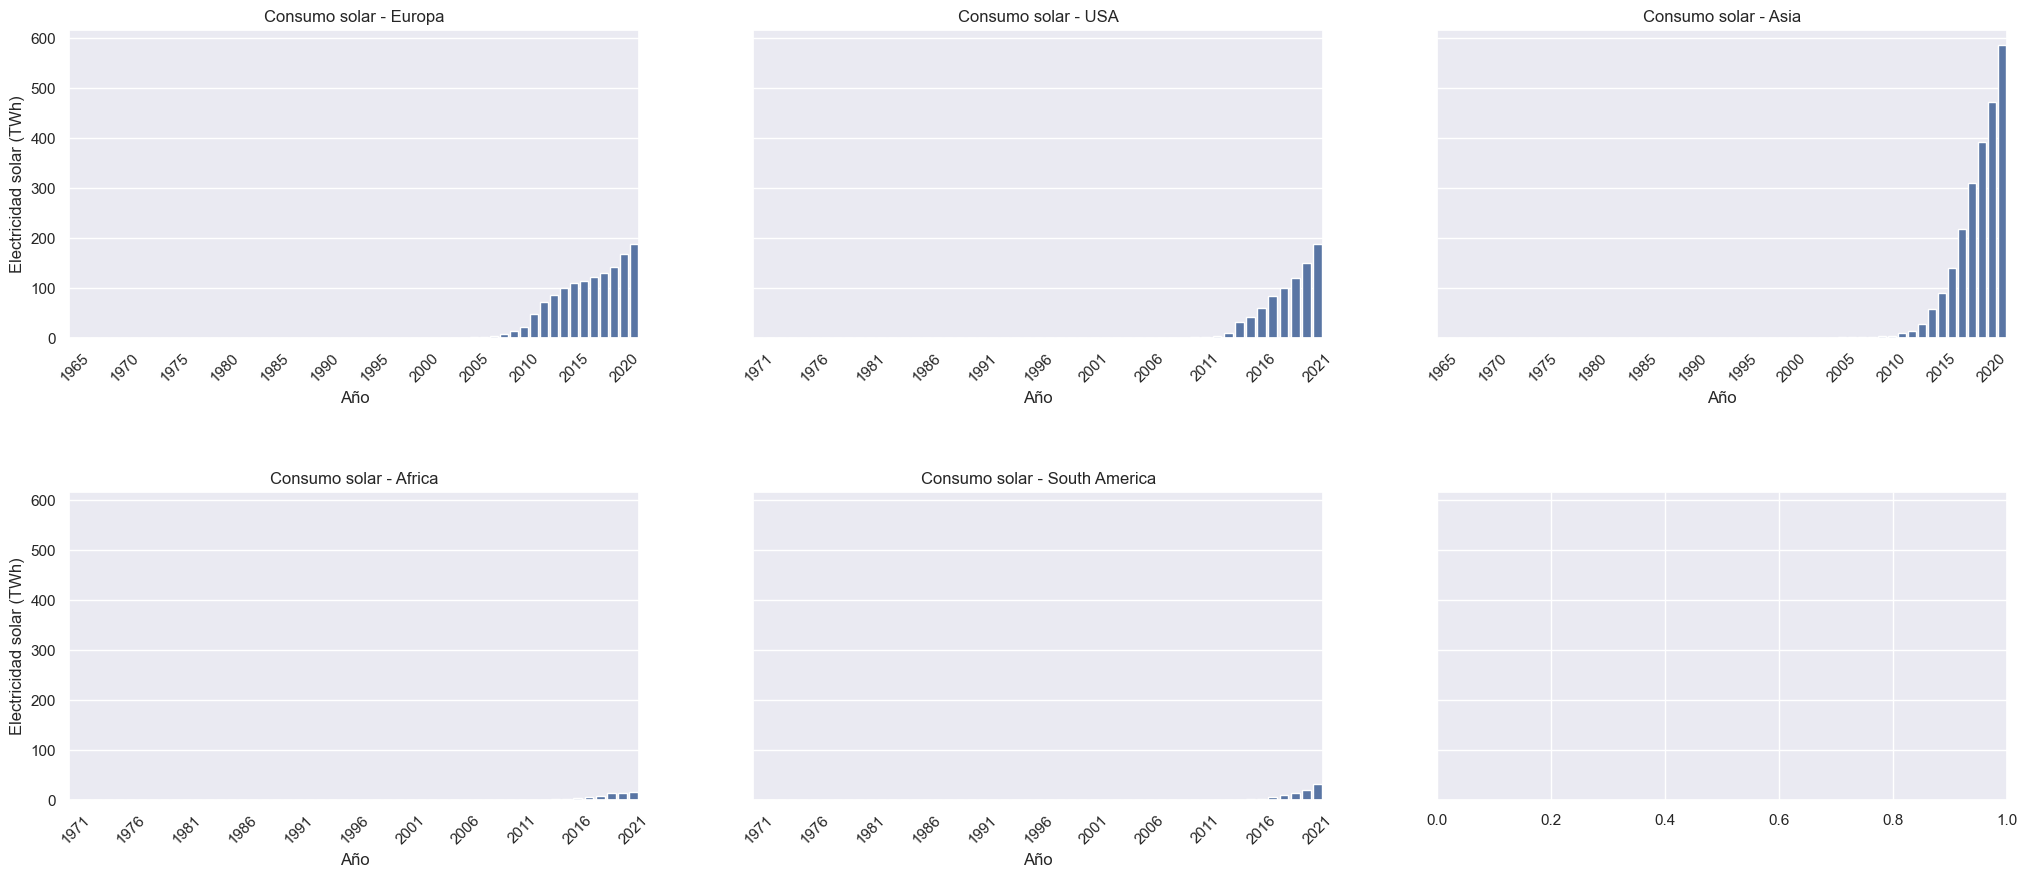

In [126]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10), sharey=True)  # Compartimos eje Y para comparar mejor

# Aumentar espacio entre filas
# Podríamos subir el valor (por ejemplo 0.7 o 1.0) para más separación
plt.subplots_adjust(hspace=0.5)  

#EUROPE
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_europe,
            ax = axes[0,0])

# Mostrar solo ciertos años, por ejemplo, cada 5
years_europe = df_solar_consump_europe["Year"].unique()
axes[0,0].set_xticks(years_europe[::5])
axes[0,0].set_xticklabels(years_europe[::5], rotation=45)
axes[0,0].set_title("Consumo solar - Europa")
axes[0,0].set_xlabel("Año")
axes[0,0].set_ylabel("Electricidad solar (TWh)")

#USA
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_usa,
            ax = axes[0,1])

years_usa = df_solar_consump_usa["Year"].unique()
axes[0,1].set_xticks(years_usa[::5])
axes[0,1].set_xticklabels(years_usa[::5], rotation=45)
axes[0,1].set_title("Consumo solar - USA")
axes[0,1].set_xlabel("Año")
axes[0,1].set_ylabel("Electricidad solar (TWh)")


#ASIA
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_asia,
            ax = axes[0,2])

years_asia = df_solar_consump_asia["Year"].unique()
axes[0,2].set_xticks(years_asia[::5])
axes[0,2].set_xticklabels(years_asia[::5], rotation=45)
axes[0,2].set_title("Consumo solar - Asia")
axes[0,2].set_xlabel("Año")
axes[0,2].set_ylabel("Electricidad solar (TWh)")

#South_america
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_africa,
            ax = axes[1,0])

years_africa = df_solar_consump_africa["Year"].unique()
axes[1,0].set_xticks(years_africa[::5])
axes[1,0].set_xticklabels(years_africa[::5], rotation=45)
axes[1,0].set_title("Consumo solar - Africa")
axes[1,0].set_xlabel("Año")
axes[1,0].set_ylabel("Electricidad solar (TWh)")


#South_america
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_south_america,
            ax = axes[1,1])

years_south_america = df_solar_consump_south_america["Year"].unique()
axes[1,1].set_xticks(years_south_america[::5])
axes[1,1].set_xticklabels(years_south_america[::5], rotation=45)
axes[1,1].set_title("Consumo solar - South America")
axes[1,1].set_xlabel("Año")
axes[1,1].set_ylabel("Electricidad solar (TWh)")
;

### `13-installed-solar-PV-capacity.csv`:

Ideas:
- Solar Capacity: no tenemos ni idea en qué unidades está esto. En principio decmos que son GWp (Giga Watt pico). Al estar por países/zonas, debería ser así, ya que los MW se quedarían cortos.


- `definición`: potencia solar fotovoltaica (no hay termosolar) instalada por territorio. No puede ser GWh , le sobra la hora porque estamos ante una medida de potencia no una medida de energía (la energía si lleva la hora).

In [50]:
df_solar_installed = pd.read_csv('data/raw/13-installed-solar-PV-capacity.csv')

In [51]:
df_solar_installed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          1659 non-null   object 
 1   Code            1243 non-null   object 
 2   Year            1659 non-null   int64  
 3   Solar Capacity  1659 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 52.0+ KB


In [52]:
#mirando los datos de españa de esta tabla y comparándolos con los datos de España del 2021, 
# llegamos a la conclusion de que esta medida son GW y que en en el 2021 en la fuente contrastada son 14,8 GW
df_solar_installed[df_solar_installed['Entity'] == 'Spain'].tail()

,Entity,Code,Year,Solar Capacity
1346,Spain,ESP,2017,4.723000
1347,Spain,ESP,2018,4.763607
1348,Spain,ESP,2019,8.839253
1349,Spain,ESP,2020,10.285477
1350,Spain,ESP,2021,13.648477


In [53]:
#vemos los que más capacidad solar tienen instalada en 2021:
df_solar_installed[(df_solar_installed["Code"].notna()) & (df_solar_installed["Entity"] != "World") & (df_solar_installed["Year"] == 2021)].sort_values('Solar Capacity', ascending=False).head(20)

,Entity,Code,Year,Solar Capacity
389,China,CHN,2021,306.402800
1584,United States,USA,2021,93.713016
779,Japan,JPN,2021,74.191000
571,Germany,DEU,2021,58.459000
701,India,IND,2021,49.341508
753,Italy,ITA,2021,22.692040
181,Australia,AUS,2021,19.074000
1298,South Korea,KOR,2021,18.160574
1632,Vietnam,VNM,2021,16.660490
545,France,FRA,2021,14.709225


In [54]:
df_solar_installed.head()

,Entity,Code,Year,Solar Capacity
0,Africa,NaN,1996,0.001112
1,Africa,NaN,1997,0.003137
2,Africa,NaN,1998,0.005162
3,Africa,NaN,1999,0.008199
4,Africa,NaN,2000,0.010927


In [55]:
df_solar_installed.isna().sum()/df_solar_installed.shape[0]*100

Entity             0.000000
Code              25.075347
Year               0.000000
Solar Capacity     0.000000
dtype: float64

In [56]:
df_solar_installed.rename(columns = {'Solar Capacity': 'Solar Capacity (GW)'}, inplace = True)

In [57]:
df_solar_installed.to_csv('data/usable/territorial_solar_capacity.csv')

----> hacer en tableau: `Merge consumption// capacity solar`:

- potencia real consumida entre el máximo de capacidad solar de cada territorio.

- Para que tengan ambas unidades coincidentes: la potencia hay que dividira entre 1000 para sacar la proporción.

### `15-share-electricity-solar.csv`:

- Solar (% electricity): porcentaje sobre total de electricidad producida. Me comenta mi padre que podría ser de electricidad consumida en lugar de producida, pero que normalmente cuando se habla en genérico se entiende que es `producida o generada` y ya luego la consumida puede variar un poco en función de lo exportado/importado, pero suele ir bastante parejo con lo producido.

In [58]:
df_elec_solar = pd.read_csv('data/raw/15-share-electricity-solar.csv')

In [114]:
#vemos los que más % de electricidad solar producida son:
df_elec_solar[(df_elec_solar["Code"].notna()) & (df_elec_solar["Entity"] != "World") & (df_elec_solar["Year"] == 2021)].sort_values('Solar (% electricity)', ascending=False).head(20)

,Entity,Code,Year,Solar (% electricity)
1418,Cook Islands,COK,2021,40.000000
4199,Namibia,NAM,2021,24.203821
4843,Palestine,PSE,2021,23.255814
6826,Yemen,YEM,2021,17.045456
1852,El Salvador,SLV,2021,16.920732
3215,Jordan,JOR,2021,15.996345
3665,Luxembourg,LUX,2021,14.634146
6646,Vanuatu,VUT,2021,14.285714
1278,Chile,CHL,2021,13.237639
6196,Tonga,TON,2021,12.500000


In [60]:
#por qué no sale china???
df_elec_solar[df_elec_solar['Entity'] == 'China'].tail()

,Entity,Code,Year,Solar (% electricity)
1311,China,CHN,2017,1.796208
1312,China,CHN,2018,2.484341
1313,China,CHN,2019,3.002081
1314,China,CHN,2020,3.375448
1315,China,CHN,2021,3.854305


In [61]:
#Buscamos España igualmente, para hacer la comparación con datos reales de otras fuentes, y es correcto.
df_elec_solar[df_elec_solar['Entity'] == 'Spain'].tail()

,Entity,Code,Year,Solar (% electricity)
5833,Spain,ESP,2018,4.685891
5834,Spain,ESP,2019,5.574218
5835,Spain,ESP,2020,7.958264
5836,Spain,ESP,2021,10.007016
5837,Spain,ESP,2022,11.505917


In [62]:
df_elec_solar.head()

,Entity,Code,Year,Solar (% electricity)
0,Afghanistan,AFG,2000,0.0
1,Afghanistan,AFG,2001,0.0
2,Afghanistan,AFG,2002,0.0
3,Afghanistan,AFG,2003,0.0
4,Afghanistan,AFG,2004,0.0


In [63]:
df_elec_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 6871 non-null   object 
 1   Code                   5781 non-null   object 
 2   Year                   6871 non-null   int64  
 3   Solar (% electricity)  6871 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 214.8+ KB


In [64]:
df_elec_solar.isna().sum()/df_elec_solar.shape[0]*100

Entity                    0.000000
Code                     15.863775
Year                      0.000000
Solar (% electricity)     0.000000
dtype: float64

In [65]:
df_elec_solar.duplicated().sum()

np.int64(0)

In [66]:
df_elec_solar.to_csv('data/usable/territorial_solar_electricity.csv')

### `08-wind-generation.csv`:
 

- `definición`: energía eólica generada en un año y en un territorio específico

In [67]:
df_generation_wind = pd.read_csv('data/raw/08-wind-generation.csv')

In [68]:
#vemos los que más % de electricidad solar producida son:
df_generation_wind[(df_generation_wind["Code"].notna()) & (df_generation_wind["Entity"] != "World") & (df_generation_wind["Year"] == 2021)].sort_values('Electricity from wind (TWh)', ascending=False).head(10)

,Entity,Code,Year,Electricity from wind (TWh)
1646,China,CHN,2021,655.60
8210,United States,USA,2021,378.20
3038,Germany,DEU,2021,114.65
1113,Brazil,BRA,2021,71.50
3637,India,IND,2021,68.09
8153,United Kingdom,GBR,2021,65.02
7334,Spain,ESP,2021,62.06
2836,France,FRA,2021,36.83
1393,Canada,CAN,2021,35.21
7930,Turkey,TUR,2021,31.21


In [69]:
#creamos columna GWh para poder compararla luego con la capacity que está en esta unidad
df_generation_wind['Electricity from wind (GWh)'] = df_generation_wind['Electricity from wind (TWh)']*1000

In [70]:
#China??:
df_generation_wind[df_generation_wind['Entity'] == "China"].tail()

,Entity,Code,Year,Electricity from wind (TWh),Electricity from wind (GWh)
1642,China,CHN,2017,304.6,304600.0
1643,China,CHN,2018,365.8,365800.0
1644,China,CHN,2019,405.3,405300.0
1645,China,CHN,2020,466.5,466500.0
1646,China,CHN,2021,655.6,655600.0


In [71]:
df_generation_wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       8676 non-null   object 
 1   Code                         7217 non-null   object 
 2   Year                         8676 non-null   int64  
 3   Electricity from wind (TWh)  8676 non-null   float64
 4   Electricity from wind (GWh)  8676 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 339.0+ KB


In [72]:
df_generation_wind.isna().sum()/df_generation_wind.shape[0]*100

Entity                          0.000000
Code                           16.816505
Year                            0.000000
Electricity from wind (TWh)     0.000000
Electricity from wind (GWh)     0.000000
dtype: float64

In [73]:
df_generation_wind['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2022])

In [74]:
df_generation_wind.duplicated().sum()

np.int64(0)

In [75]:
df_generation_wind[df_generation_wind['Entity'] == "Spain"].tail()

,Entity,Code,Year,Electricity from wind (TWh),Electricity from wind (GWh)
7331,Spain,ESP,2018,50.90,50900.0
7332,Spain,ESP,2019,55.65,55650.0
7333,Spain,ESP,2020,56.44,56440.0
7334,Spain,ESP,2021,62.06,62060.0
7335,Spain,ESP,2022,61.85,61850.0


In [76]:
df_generation_wind.to_csv('data/usable/territorial_wind_generation.csv')

Mismo número de nulos en Code que en los de energía solar. Los datos de España y las unidades cuadran con otras fuentes.

In [127]:
#convertimos Year en string para poder hacer visualizaciones:
df_generation_wind['Year'] = df_generation_wind['Year'].apply(lambda x: str(x))

In [129]:
df_generation_wind_europe = df_generation_wind[df_generation_wind['Entity'] == 'Europe']
df_generation_wind_africa = df_generation_wind[df_generation_wind['Entity'] == 'Africa']
df_generation_wind_usa = df_generation_wind[df_generation_wind['Entity'] == 'North America']
df_generation_wind_south_am = df_generation_wind[df_generation_wind['Entity'] == 'South America']
df_generation_wind_asia = df_generation_wind[df_generation_wind['Entity'] == 'Asia']

''

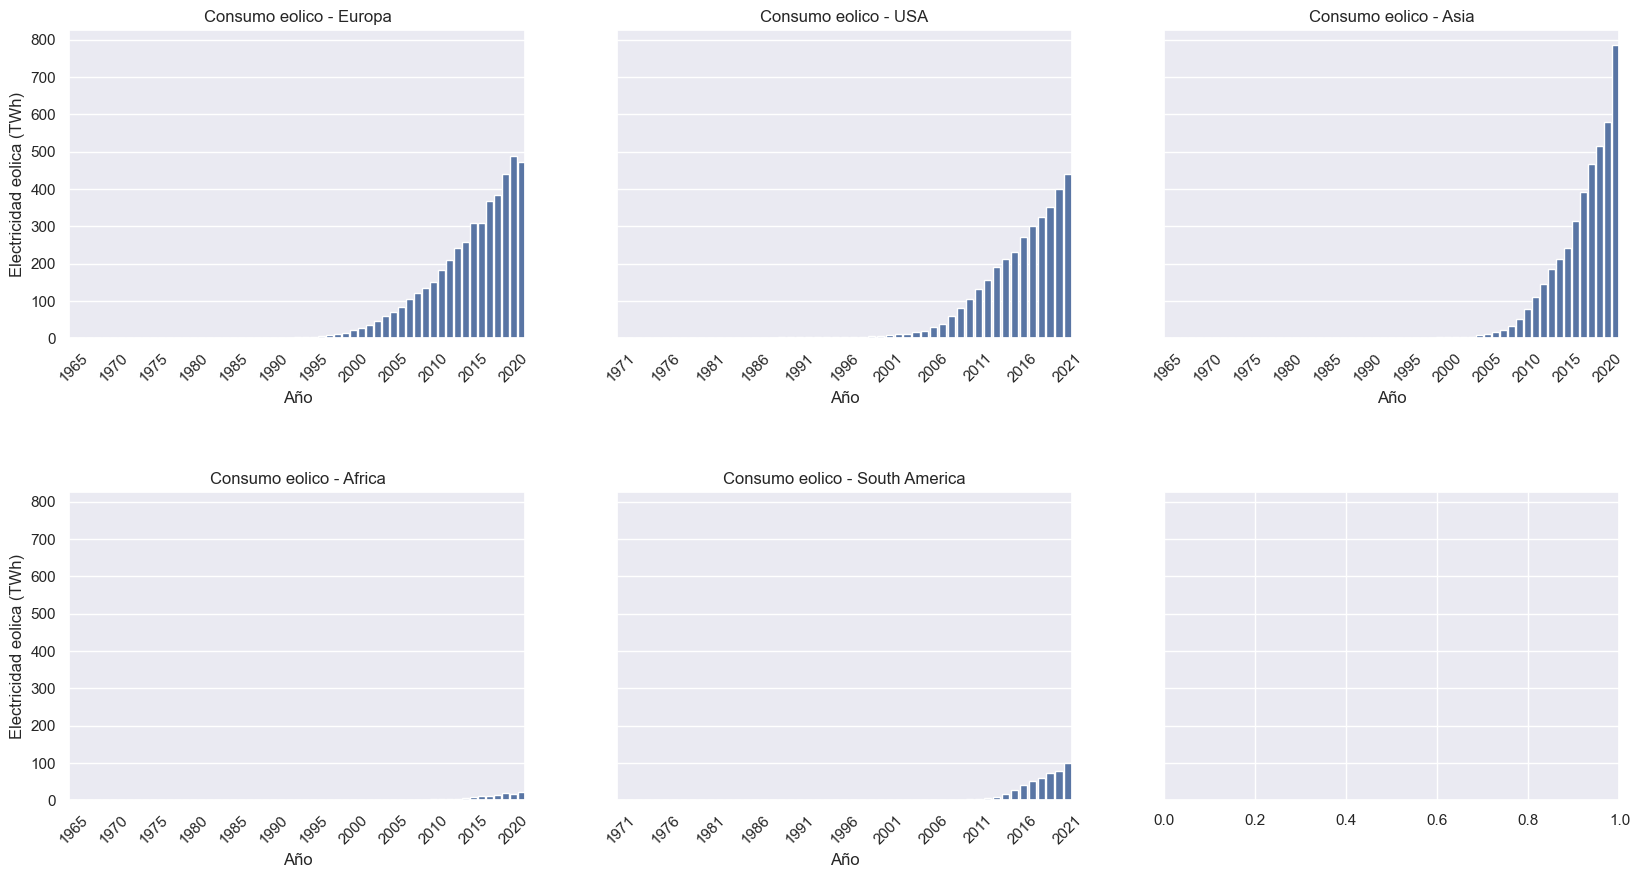

In [130]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=True)  # Compartimos eje Y para comparar mejor

# Aumentar espacio entre filas
plt.subplots_adjust(hspace=0.5)  

#EUROPE
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_europe,
            ax = axes[0,0])

# Mostrar solo ciertos años, por ejemplo, cada 5
years_europe = sorted(df_generation_wind_europe["Year"].unique())
axes[0,0].set_xticks(years_europe[::5])
axes[0,0].set_xticklabels(years_europe[::5], rotation=45)
axes[0,0].set_title("Consumo eolico - Europa")
axes[0,0].set_xlabel("Año")
axes[0,0].set_ylabel("Electricidad eolica (TWh)")

#USA
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_usa,
            ax = axes[0,1])

years_usa = sorted(df_generation_wind_usa["Year"].unique())
axes[0,1].set_xticks(years_usa[::5])
axes[0,1].set_xticklabels(years_usa[::5], rotation=45)
axes[0,1].set_title("Consumo eolico - USA")
axes[0,1].set_xlabel("Año")
axes[0,1].set_ylabel("Electricidad eolica (TWh)")


#ASIA
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_asia,
            ax = axes[0,2])

years_asia = sorted(df_generation_wind_asia["Year"].unique())
axes[0,2].set_xticks(years_asia[::5])
axes[0,2].set_xticklabels(years_asia[::5], rotation=45)
axes[0,2].set_title("Consumo eolico - Asia")
axes[0,2].set_xlabel("Año")
axes[0,2].set_ylabel("Electricidad eolica (TWh)")

#South_america
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_africa,
            ax = axes[1,0])

years_africa = sorted(df_generation_wind_africa["Year"].unique())
axes[1,0].set_xticks(years_africa[::5])
axes[1,0].set_xticklabels(years_africa[::5], rotation=45)
axes[1,0].set_title("Consumo eolico - Africa")
axes[1,0].set_xlabel("Año")
axes[1,0].set_ylabel("Electricidad eolica (TWh)")


#South_america
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_south_am,
            ax = axes[1,1])

years_south_america = sorted(df_generation_wind_south_am["Year"].unique())
axes[1,1].set_xticks(years_south_america[::5])
axes[1,1].set_xticklabels(years_south_america[::5], rotation=45)
axes[1,1].set_title("Consumo eolico - South America")
axes[1,1].set_xlabel("Año")
axes[1,1].set_ylabel("Electricidad eolica (TWh)")

;

### `11-share-electricity-wind.csv`:
- Wind (% electricity): porcentaje total de viento sobre total de electricidad producida


In [77]:
df_elec_wind = pd.read_csv('data/raw/11-share-electricity-wind.csv')

In [78]:
df_elec_wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                6871 non-null   object 
 1   Code                  5781 non-null   object 
 2   Year                  6871 non-null   int64  
 3   Wind (% electricity)  6871 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 214.8+ KB


In [79]:
df_elec_wind.head()

,Entity,Code,Year,Wind (% electricity)
0,Afghanistan,AFG,2000,0.0
1,Afghanistan,AFG,2001,0.0
2,Afghanistan,AFG,2002,0.0
3,Afghanistan,AFG,2003,0.0
4,Afghanistan,AFG,2004,0.0


In [80]:
df_elec_wind.duplicated().sum()

np.int64(0)

In [81]:
df_elec_wind.isna().sum()/df_elec_wind.shape[0]*100

Entity                   0.000000
Code                    15.863775
Year                     0.000000
Wind (% electricity)     0.000000
dtype: float64

In [108]:
df_elec_wind.describe()

,Year,Wind (% electricity)
count,6871.000000,6871.000000
mean,2006.532091,1.358413
std,9.626237,4.443913
min,1985.000000,0.000000
25%,2000.000000,0.000000
50%,2007.000000,0.000000
75%,2014.000000,0.325835
max,2022.000000,56.839542


In [115]:
df_elec_wind[(df_elec_wind["Code"].notna()) & (df_elec_wind["Entity"] != "World") & (df_elec_wind["Year"] == 2021)].sort_values('Wind (% electricity)', ascending=False).head(20)

,Entity,Code,Year,Wind (% electricity)
2174,Falkland Islands,FLK,2021,50.000000
1652,Denmark,DNK,2021,48.548088
3568,Lithuania,LTU,2021,32.613907
6592,Uruguay,URY,2021,31.542350
3058,Ireland,IRL,2021,30.949368
5058,Portugal,PRT,2021,26.739483
3665,Luxembourg,LUX,2021,25.203250
5836,Spain,ESP,2021,22.916435
6474,United Kingdom,GBR,2021,21.168120
2453,Germany,DEU,2021,19.691193


In [83]:
df_elec_wind.to_csv('data/usable/territorial_wind_electricity.csv')

In [84]:
df_elec_wind[(df_elec_wind['Entity'] == "Spain") & (df_elec_wind['Year'] == 2022)]

,Entity,Code,Year,Wind (% electricity)
5837,Spain,ESP,2022,21.716232


Los datos cuadran con otras fuentes.

Podría ser interesante ver la variación de generación en el tiempo (para esta y otras) sólo para los países que consideremos "clave" en la producción de energías renovables.

### `09-cumulative-installed-wind-energy-capacity-gigawatts`:

- `definición`: potencia eólica instalada por territorio en GWp.

- Máximo que se puede generar a cierta fecha: es decir, total de potencia instalada a lo largo del tiempo.
- preguntas de viento : cuánto produce, capacidad de producir.. nos centramos más en la capacidad y producción que en el consumo, porque no tenemos ese dato.

In [85]:
df_installed_wind = pd.read_csv('data/raw/09-cumulative-installed-wind-energy-capacity-gigawatts.csv')

In [86]:
df_installed_wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entity         1540 non-null   object 
 1   Code           1143 non-null   object 
 2   Year           1540 non-null   int64  
 3   Wind Capacity  1540 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.3+ KB


In [87]:
df_installed_wind.isna().sum()/df_installed_wind.shape[0]*100

Entity            0.000000
Code             25.779221
Year              0.000000
Wind Capacity     0.000000
dtype: float64

In [88]:
df_installed_wind.duplicated().sum()

np.int64(0)

In [89]:
df_installed_wind.rename(columns={'Wind Capacity' : 'Wind Capacity (GWp)'}, inplace=True)

In [90]:
#Buscamos España igualmente, para hacer la comparación con datos reales:.
df_installed_wind[(df_installed_wind['Entity'] == 'Spain')].head()

,Entity,Code,Year,Wind Capacity (GWp)
1241,Spain,ESP,1997,0.512
1242,Spain,ESP,1998,0.723
1243,Spain,ESP,1999,1.408
1244,Spain,ESP,2000,2.206
1245,Spain,ESP,2001,3.397


In [162]:
#países con mayor capacidad de tecnología de viento instalada en 2021
df_installed_wind[(df_installed_wind["Code"].notna()) & (df_installed_wind["Entity"] != "World") & (df_installed_wind["Year"] == 2021)].sort_values('Wind Capacity (GWp)', ascending=False).head(7)

,Entity,Code,Year,Wind Capacity (GWp)
346,China,CHN,2021,328.973440
1462,United States,USA,2021,132.737600
546,Germany,DEU,2021,63.760000
621,India,IND,2021,40.067266
1265,Spain,ESP,2021,27.497190
1437,United Kingdom,GBR,2021,27.129990
224,Brazil,BRA,2021,21.161270


In [91]:
df_installed_wind.head()

,Entity,Code,Year,Wind Capacity (GWp)
0,Africa,NaN,1997,0.00600
1,Africa,NaN,1998,0.01000
2,Africa,NaN,1999,0.06400
3,Africa,NaN,2000,0.13905
4,Africa,NaN,2001,0.13905


In [92]:
df_installed_wind.to_csv('data/usable/territorial_wind_cumulative_capacity.csv')

Parece que los datos y las unidades para España cuadran con otras fuentes. Los nulos de code parece que tienen sentido, no existe el código para áreas que no sean países.

## GDP (Gross Domestic Product) (1990-2023)
[Source](https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.PCAP.CD&country=#)

`GDP (Gross Domestic Product)`: GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.

Params:

- `time`: 1990 to 2023

- `country`: all

- `series`: NY.GDP.PCAP.CD = GDP per capita (current USD)

In [93]:
df_gdp = pd.read_csv("data/raw/gross-domestic-product.csv")

In [94]:
df_gdp.head(1)

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],1991 [YR1991],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..,..,..,174.930991430166,138.706821676113,178.954088379235,198.871115728727,221.763653873013,254.184249149336,274.218553561575,376.223152003876,625.054941813938,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585,510.787063366811,356.496214115892,357.261152798144,415.707417059086


In [95]:
#Eliminamos columnas irrelevantes:
df_gdp.drop(columns = ['Series Name', 'Series Code'], inplace = True)

In [96]:
df_gdp.head(1)

,Country Name,Country Code,1990 [YR1990],1991 [YR1991],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,..,..,..,174.930991430166,138.706821676113,178.954088379235,198.871115728727,221.763653873013,254.184249149336,274.218553561575,376.223152003876,625.054941813938,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585,510.787063366811,356.496214115892,357.261152798144,415.707417059086


In [97]:
#renombramos las columnas:
df_gdp.columns  = ['Country Name', 'Country Code', '1990', '1991',
       '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006',
       '2007', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020',
       '2021', '2022', '2023']

In [98]:
df_gdp.head(1)

,Country Name,Country Code,1990,1991,1999,2000,2001,2002,2003,2004,2005,2006,2007,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,..,..,..,174.930991430166,138.706821676113,178.954088379235,198.871115728727,221.763653873013,254.184249149336,274.218553561575,376.223152003876,625.054941813938,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585,510.787063366811,356.496214115892,357.261152798144,415.707417059086


In [99]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  266 non-null    object
 1   Country Code  266 non-null    object
 2   1990          266 non-null    object
 3   1991          266 non-null    object
 4   1999          266 non-null    object
 5   2000          266 non-null    object
 6   2001          266 non-null    object
 7   2002          266 non-null    object
 8   2003          266 non-null    object
 9   2004          266 non-null    object
 10  2005          266 non-null    object
 11  2006          266 non-null    object
 12  2007          266 non-null    object
 13  2014          266 non-null    object
 14  2015          266 non-null    object
 15  2016          266 non-null    object
 16  2017          266 non-null    object
 17  2018          266 non-null    object
 18  2019          266 non-null    object
 19  2020    

In [100]:
lista_col =['1990', '1991', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023']

for col in lista_col:
    df_gdp[col]= pd.to_numeric(df_gdp[col].astype(str).str.strip(), errors='coerce')

In [101]:
#hay duplicados, los eliminamos:
df_gdp.duplicated().sum()

np.int64(4)

In [102]:
df_gdp = df_gdp.drop_duplicates()

In [103]:
#Comprobamos si ahora hay duplicados:
df_gdp.duplicated().sum()

np.int64(0)

In [104]:
#Gestion de nulos:
df_gdp.isnull().sum()/df_gdp.shape[0]*100

Country Name     0.374532
Country Code     0.374532
1990            10.112360
1991             9.737828
1999             6.367041
2000             5.617978
2001             5.243446
2002             3.745318
2003             3.745318
2004             3.745318
2005             3.745318
2006             3.370787
2007             3.370787
2014             2.247191
2015             2.996255
2016             3.370787
2017             3.370787
2018             3.370787
2019             2.996255
2020             3.370787
2021             3.370787
2022             4.494382
2023             8.988764
dtype: float64

In [105]:
df_gdp_trans = sp.pivot_df(df_gdp, ['Country Name', 'Country Code'], 'Year', 'GDP($)')

In [106]:
df_gdp.to_csv('data/usable/gross-domestic-product.csv', index=False)

In [117]:
df_gdp_trans.head(1)

,Country Name,Country Code,Year,GDP($)
0,Afghanistan,AFG,1990,NaN


In [119]:
df_gdp_trans[df_gdp_trans['Year'] == '2021'].sort_values(ascending = False, by = 'GDP($)').head(10)

,Country Name,Country Code,Year,GDP($)
4936,Monaco,MCO,2021,223823.363960
4920,Liechtenstein,LIE,2021,196783.729415
4922,Luxembourg,LUX,2021,133711.794436
4827,Bermuda,BMU,2021,112712.025121
4899,Ireland,IRL,2021,105561.137469
4900,Isle of Man,IMN,2021,94299.969349
4994,Switzerland,CHE,2021,93446.434452
4953,Norway,NOR,2021,93072.892512
4842,Cayman Islands,CYM,2021,86438.445257
4977,Singapore,SGP,2021,79601.412962


In [107]:
df_gdp_trans.to_csv('data/usable/gross-domestic-product-trans.csv', index=False)

## Visualizaciones con todas las variables:

In [131]:
df_gdp = pd.read_csv("data/usable/gross-domestic-product-pivot.csv")
df_solar_capacity = pd.read_csv("data/usable/territorial_solar_capacity.csv", index_col = 0)
df_solar_electricity = pd.read_csv("data/usable/territorial_solar_electricity.csv", index_col = 0)
df_wind_cumulative_capacity = pd.read_csv("data/usable/territorial_wind_cumulative_capacity.csv", index_col = 0)
df_wind_electricity = pd.read_csv("data/usable/territorial_wind_electricity.csv", index_col = 0)

In [132]:
#que todos los Year sean integers:
df_gdp['Year'] = df_gdp['Year'].astype(int)
df_solar_capacity['Year'] = df_solar_capacity['Year'].astype(int)
df_generation_wind['Year'] = df_generation_wind['Year'].astype(int)
df_solar_consump['Year'] = df_solar_consump['Year'].astype(int)
df_solar_electricity['Year'] = df_solar_electricity['Year'].astype(int)
df_wind_cumulative_capacity['Year'] = df_wind_cumulative_capacity['Year'].astype(int)
df_wind_electricity['Year'] = df_wind_electricity['Year'].astype(int)

In [154]:
df_capacity = df_solar_capacity.merge(df_wind_cumulative_capacity, on = ['Entity','Year'])
df_generation_consump = df_solar_consump.merge(df_generation_wind, on = ['Entity','Year'])
df_electricity = df_solar_electricity.merge(df_wind_electricity, on = ['Entity','Year'])

In [134]:
#Tenemos que eliminar los que tengan NaN en código, para ello, eliminamos aquellas filas cuyo código sea nulo:
df_capacity = df_capacity[df_capacity['Code_x'].notna()]
df_generation_consump = df_generation_consump[df_generation_consump['Code_x'].notna()]
df_electricity = df_electricity[df_electricity['Code_x'].notna()]


In [135]:
df_merge1 = df_gdp.merge(df_capacity, left_on = ['Country Code','Year'], right_on = ['Code_x','Year'])
df_merge1 = df_merge1.drop(columns=['Code_x','Code_y', 'Entity'])

In [136]:
df_merge2 = df_merge1.merge(df_generation_consump, left_on = ['Country Code','Year'], right_on = ['Code_x','Year'])
df_merge2 = df_merge2.drop(columns=['Code_x','Code_y', 'Entity'])

In [137]:
df_merge3 = df_merge2.merge(df_electricity, left_on = ['Country Code','Year'], right_on = ['Code_x','Year'])
df_merge3 = df_merge3.drop(columns=['Code_x','Code_y', 'Entity'])

In [139]:
df_merge3['Country Name'].value_counts().head()

Country Name
Argentina    17
Australia    17
Austria      17
Belgium      17
Brazil       17
Name: count, dtype: int64

In [140]:
#Vemos que este no aparece porqe no tiene PIB
df_merge3[df_merge3['Country Name'] == 'Cook Island'] 

,Country Name,Country Code,Year,GDP($),Solar Capacity (GW),Wind Capacity (GWp),Electricity from solar (TWh),Electricity from solar (GWh),Electricity from wind (TWh),Electricity from wind (GWh),Solar (% electricity),Wind (% electricity)


In [171]:
# Creamos columna Factor de capacidad ('wind energy capacity factor' y 'solar energy capacity factor'):
# Electricity from solar (GWh)// Solar Capacity (GWp)
# Electricity from wind (GWh)// Wind Capacity (GWp)
df_merge3['solar energy capacity factor'] = df_merge3['Electricity from solar (GWh)']// df_merge3['Solar Capacity (GW)']*100
df_merge3['wind energy capacity factor'] = df_merge3['Electricity from wind (GWh)']// df_merge3['Wind Capacity (GWp)']*100

In [172]:
df_merge3[df_merge3['Country Name'] == 'China']

,Country Name,Country Code,Year,GDP($),Solar Capacity (GW),Wind Capacity (GWp),Electricity from solar (TWh),Electricity from solar (GWh),Electricity from wind (TWh),Electricity from wind (GWh),Solar (% electricity),Wind (% electricity),solar energy capacity factor,wind energy capacity factor
8,China,CHN,1999,873.292336,0.010000,0.26200,0.017,0.000017,0.473737,473.7374,0.001372,0.038226,0.0,180800.0
41,China,CHN,2000,959.360431,0.033515,0.34100,0.020,0.000020,0.590000,590.0000,0.001475,0.043523,0.0,173000.0
77,China,CHN,2001,1053.112314,0.038020,0.38300,0.030,0.000030,0.720000,720.0000,0.002026,0.048623,0.0,187900.0
113,China,CHN,2002,1148.514257,0.056530,0.44900,0.050,0.000050,0.840000,840.0000,0.003023,0.050786,0.0,187000.0
149,China,CHN,2003,1288.637491,0.066600,0.54700,0.060,0.000060,1.000000,1000.0000,0.003140,0.052340,0.0,182800.0
185,China,CHN,2004,1508.667916,0.076600,0.76300,0.080,0.000080,1.280000,1280.0000,0.003631,0.058094,0.0,167700.0
221,China,CHN,2005,1753.414192,0.141200,1.06000,0.080,0.000080,1.950000,1950.0000,0.003200,0.077992,0.0,183900.0
257,China,CHN,2006,2099.219430,0.160200,2.07000,0.090,0.000090,3.710000,3710.0000,0.003141,0.129461,0.0,179200.0
293,China,CHN,2007,2693.958732,0.199000,4.20000,0.110,0.000110,5.480000,5480.0000,0.003352,0.166995,0.0,130400.0
329,China,CHN,2014,7636.074340,28.387800,96.81913,23.510,0.023510,159.760000,159760.0000,0.407572,2.769615,0.0,165000.0


In [138]:
df_merge3.to_csv('data/usable/wind-solar-gdp.csv', index=False)

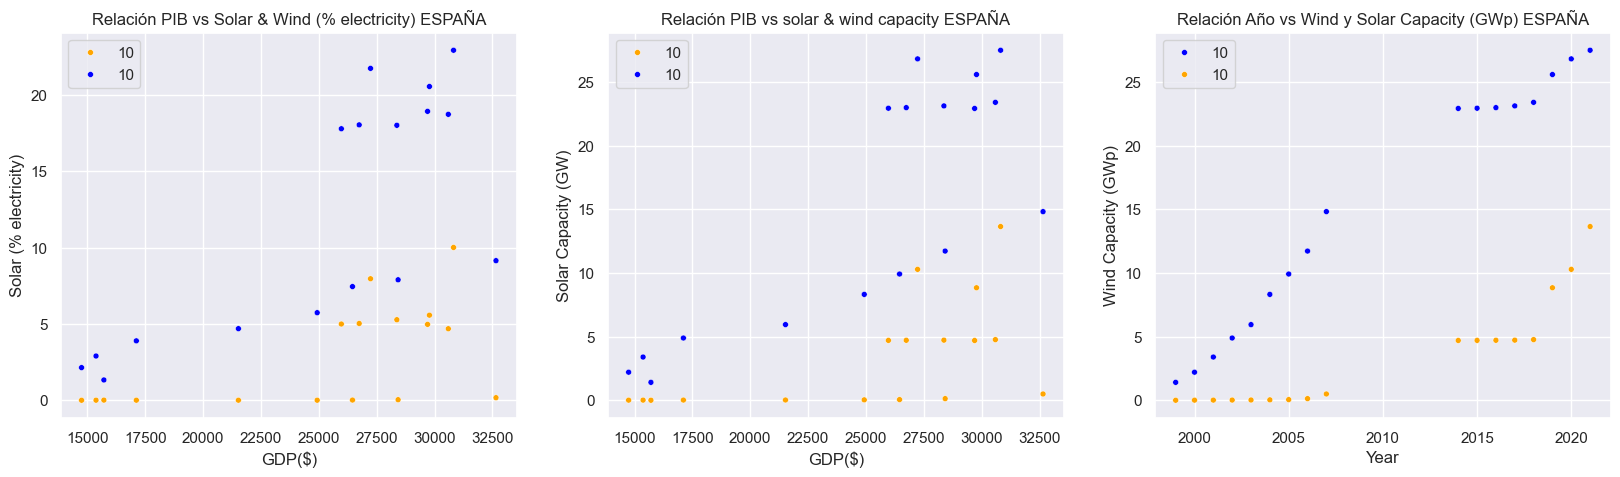

In [141]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

# Aumentar espacio entre filas
plt.subplots_adjust(hspace=0.6)  

sns.scatterplot(x = "GDP($)", 
                y = "Solar (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 10, 
                color = "orange",
                ax = axes[0])

axes[0].set_title("Relación PIB vs Solar & Wind (% electricity) ESPAÑA")

sns.scatterplot(x = "GDP($)", 
                y = "Wind (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 10, 
                color = "blue",
                ax = axes[0])


sns.scatterplot(x = "GDP($)", 
                y = "Solar Capacity (GW)", 
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 10, 
                color = "orange",
                ax = axes[1])

axes[1].set_title("Relación PIB vs solar & wind capacity ESPAÑA")


sns.scatterplot(x = "GDP($)", 
                y = "Wind Capacity (GWp)", 
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 10, 
                color = "blue",
                ax = axes[1])



sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 10, 
                color = "blue",
                ax = axes[2])

axes[2].set_title("Relación Año vs Wind y Solar Capacity (GWp) ESPAÑA")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 10, 
                color = "orange",
                ax = axes[2]);

''

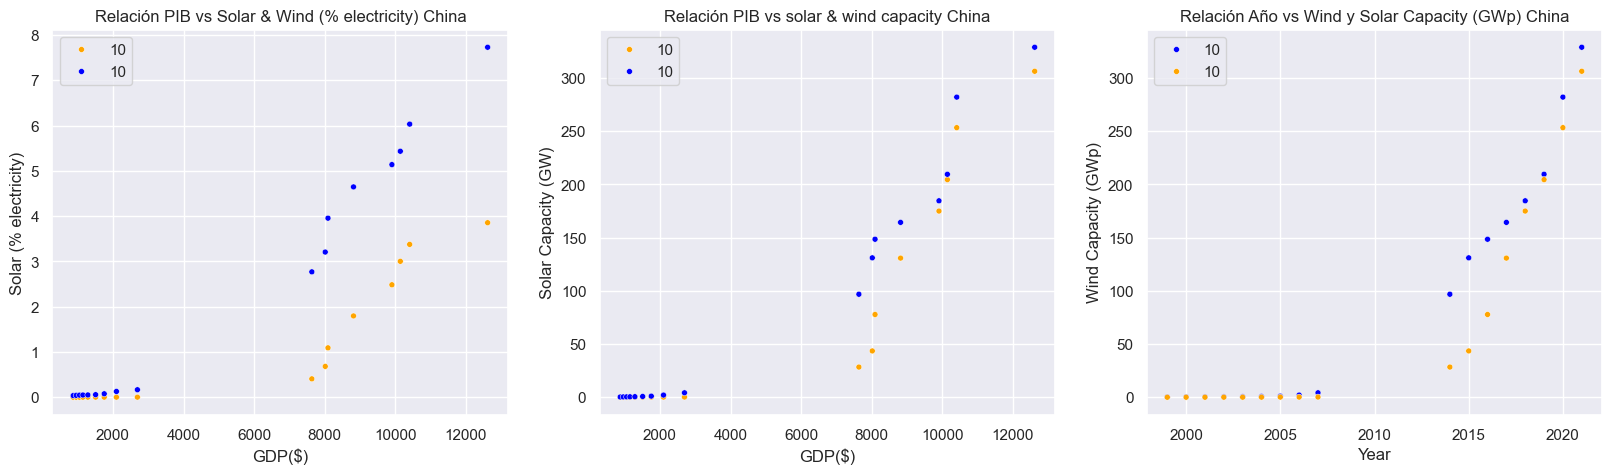

In [145]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

# Aumentar espacio entre filas
plt.subplots_adjust(hspace=0.6)  

sns.scatterplot(x = "GDP($)", 
                y = "Solar (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 10, 
                color = "orange",
                ax = axes[0])

axes[0].set_title("Relación PIB vs Solar & Wind (% electricity) China")

sns.scatterplot(x = "GDP($)", 
                y = "Wind (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 10, 
                color = "blue",
                ax = axes[0])


sns.scatterplot(x = "GDP($)", 
                y = "Solar Capacity (GW)", 
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 10, 
                color = "orange",
                ax = axes[1])

axes[1].set_title("Relación PIB vs solar & wind capacity China")


sns.scatterplot(x = "GDP($)", 
                y = "Wind Capacity (GWp)", 
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 10, 
                color = "blue",
                ax = axes[1])



sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 10, 
                color = "blue",
                ax = axes[2])

axes[2].set_title("Relación Año vs Wind y Solar Capacity (GWp) China")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 10, 
                color = "orange",
                ax = axes[2])



;

''

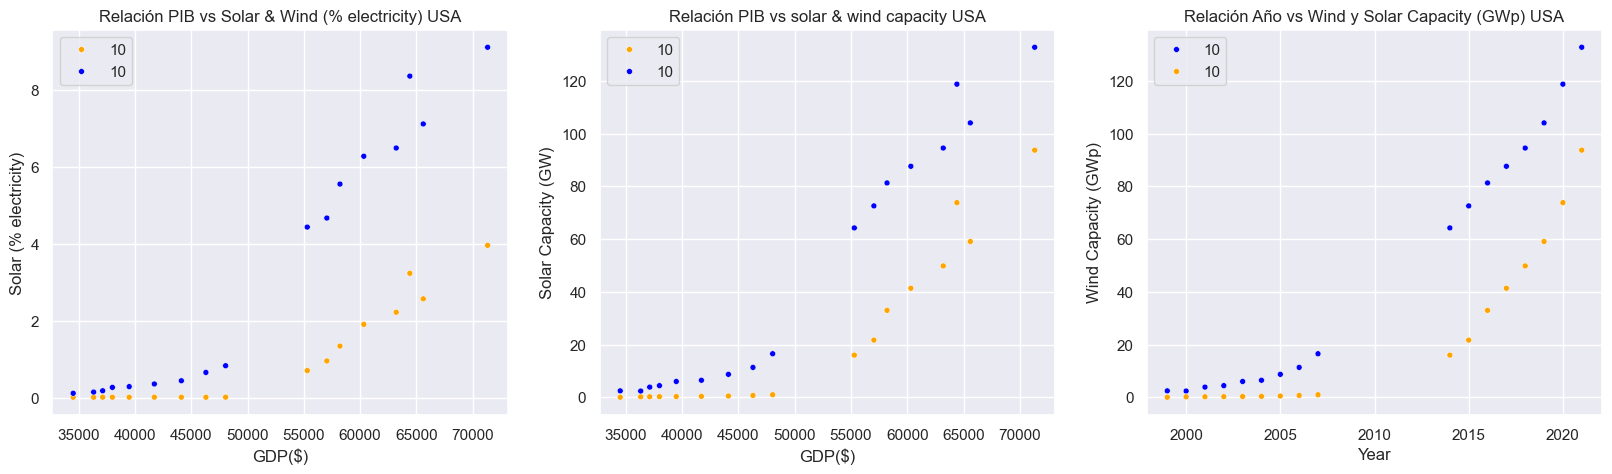

In [149]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

# Aumentar espacio entre filas
plt.subplots_adjust(hspace=0.6)  

sns.scatterplot(x = "GDP($)", 
                y = "Solar (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 10, 
                color = "orange",
                ax = axes[0])

axes[0].set_title("Relación PIB vs Solar & Wind (% electricity) USA")

sns.scatterplot(x = "GDP($)", 
                y = "Wind (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 10, 
                color = "blue",
                ax = axes[0])


sns.scatterplot(x = "GDP($)", 
                y = "Solar Capacity (GW)", 
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 10, 
                color = "orange",
                ax = axes[1])

axes[1].set_title("Relación PIB vs solar & wind capacity USA")


sns.scatterplot(x = "GDP($)", 
                y = "Wind Capacity (GWp)", 
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 10, 
                color = "blue",
                ax = axes[1])



sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 10, 
                color = "blue",
                ax = axes[2])

axes[2].set_title("Relación Año vs Wind y Solar Capacity (GWp) USA")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 10, 
                color = "orange",
                ax = axes[2])
;

''

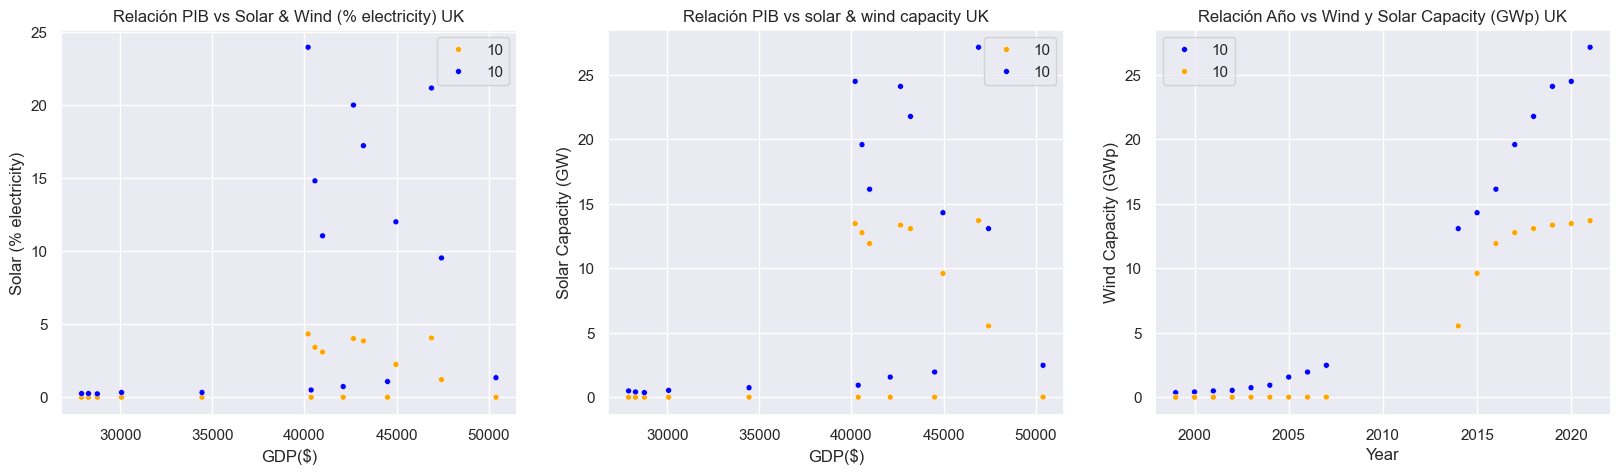

In [150]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

# Aumentar espacio entre filas
plt.subplots_adjust(hspace=0.6)  

sns.scatterplot(x = "GDP($)", 
                y = "Solar (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 10, 
                color = "orange",
                ax = axes[0])

axes[0].set_title("Relación PIB vs Solar & Wind (% electricity) UK")

sns.scatterplot(x = "GDP($)", 
                y = "Wind (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 10, 
                color = "blue",
                ax = axes[0])


sns.scatterplot(x = "GDP($)", 
                y = "Solar Capacity (GW)", 
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 10, 
                color = "orange",
                ax = axes[1])

axes[1].set_title("Relación PIB vs solar & wind capacity UK")


sns.scatterplot(x = "GDP($)", 
                y = "Wind Capacity (GWp)", 
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 10, 
                color = "blue",
                ax = axes[1])



sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 10, 
                color = "blue",
                ax = axes[2])

axes[2].set_title("Relación Año vs Wind y Solar Capacity (GWp) UK")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 10, 
                color = "orange",
                ax = axes[2])
;

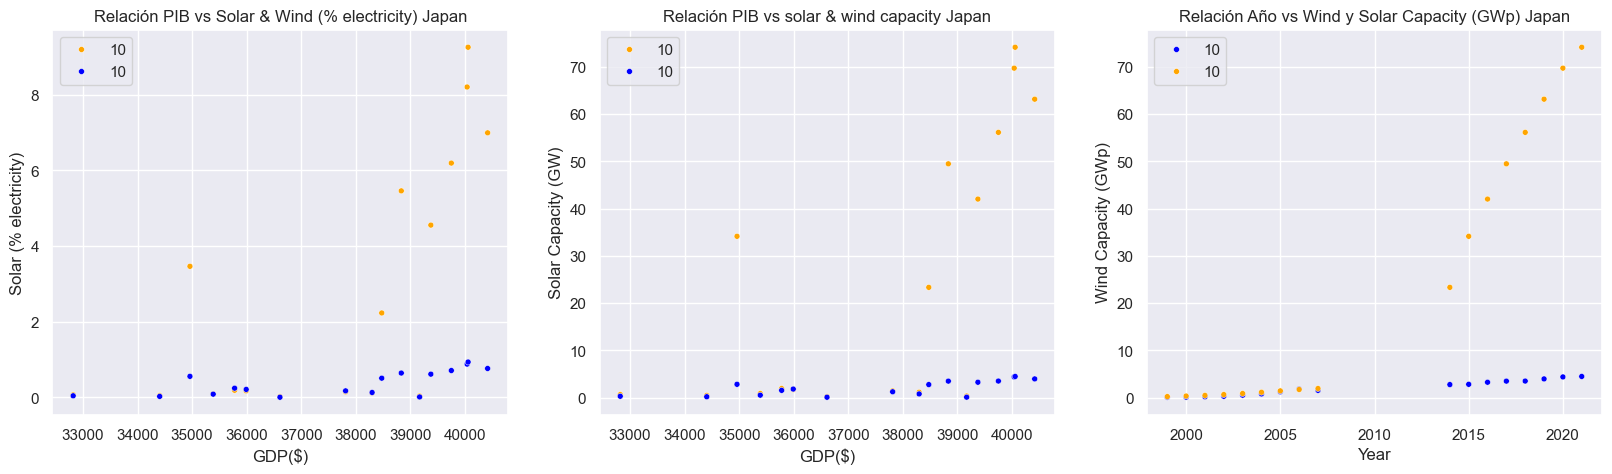

In [151]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

# Aumentar espacio entre filas
plt.subplots_adjust(hspace=0.6)  

sns.scatterplot(x = "GDP($)", 
                y = "Solar (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 10, 
                color = "orange",
                ax = axes[0])

axes[0].set_title("Relación PIB vs Solar & Wind (% electricity) Japan")

sns.scatterplot(x = "GDP($)", 
                y = "Wind (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 10, 
                color = "blue",
                ax = axes[0])


sns.scatterplot(x = "GDP($)", 
                y = "Solar Capacity (GW)", 
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 10, 
                color = "orange",
                ax = axes[1])

axes[1].set_title("Relación PIB vs solar & wind capacity Japan")


sns.scatterplot(x = "GDP($)", 
                y = "Wind Capacity (GWp)", 
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 10, 
                color = "blue",
                ax = axes[1])



sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 10, 
                color = "blue",
                ax = axes[2])

axes[2].set_title("Relación Año vs Wind y Solar Capacity (GWp) Japan")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 10, 
                color = "orange",
                ax = axes[2]);

In [152]:
#20 países con GDP más alto en 2021
df_gdp[df_gdp['Year'] == 2021].sort_values('GDP($)', ascending = False).head(20)

,Country Name,Country Code,Year,GDP($)
4936,Monaco,MCO,2021,223823.363960
4920,Liechtenstein,LIE,2021,196783.729415
4922,Luxembourg,LUX,2021,133711.794436
4827,Bermuda,BMU,2021,112712.025121
4899,Ireland,IRL,2021,105561.137469
4900,Isle of Man,IMN,2021,94299.969349
4994,Switzerland,CHE,2021,93446.434452
4953,Norway,NOR,2021,93072.892512
4842,Cayman Islands,CYM,2021,86438.445257
4977,Singapore,SGP,2021,79601.412962


In [153]:
#15 países con GDP más alto en 2020
df_gdp[df_gdp['Year'] == 2020].sort_values('GDP($)', ascending = False).head(15)

,Country Name,Country Code,Year,GDP($)
4669,Monaco,MCO,2020,176891.886538
4653,Liechtenstein,LIE,2020,164671.093553
4655,Luxembourg,LUX,2020,116905.370397
4560,Bermuda,BMU,2020,106973.175732
4632,Ireland,IRL,2020,87567.114897
4727,Switzerland,CHE,2020,85897.784334
4575,Cayman Islands,CYM,2020,82338.798285
4633,Isle of Man,IMN,2020,79513.533035
4686,Norway,NOR,2020,68340.018103
4745,United States,USA,2020,64411.373178
